importing most of the libraries needed.

In [2]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix


Using TensorFlow backend.


In [3]:
import os

In [4]:
mylist = os.listdir('E:\emotion\meld')

In [5]:
mylist

['train', 'val']

In [6]:
for i in mylist:
    print(i)

train
val


In [7]:
for filename in os.listdir('E:\emotion\meld'):
    actualfolders = 'E:\emotion\meld'+filename

In [8]:
actualfolders

'E:\\emotion\\meldval'

In [9]:
os.listdir()

['.anaconda',
 '.android',
 '.AndroidStudio2.2',
 '.AndroidStudio2.3',
 '.appletviewer',
 '.bash_history',
 '.conda',
 '.condarc',
 '.csslintrc',
 '.dotnet',
 '.ebookreader',
 '.eclipse',
 '.emulator_console_auth_token',
 '.git',
 '.gitconfig',
 '.gradle',
 '.Icecream Screen Recorder',
 '.idlerc',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.keras',
 '.matplotlib',
 '.nbi',
 '.p2',
 '.splunk',
 '.templateengine',
 '.tooling',
 '.viminfo',
 '.VirtualBox',
 '3D Objects',
 'Anaconda3',
 'AndroidStudioProjects',
 'AppData',
 'Application Data',
 'coffeelint.json',
 'Contacts',
 'Cookies',
 'Creative Cloud Files',
 'Desktop',
 'Documents',
 'Downloads',
 'eclipse',
 'Favorites',
 'Intel',
 'IntelGraphicsProfiles',
 'Links',
 'Local Settings',
 'MicrosoftEdgeBackups',
 'Music',
 'My Documents',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{8ebe95f7-3dcb-11e8-a9d9-7cfe90913f50}.TM.blf',
 'NTUSER.DAT{8ebe95f7-3dcb-11e8-a9d9-7cfe90913f50}.TMContainer0000

In [10]:
os.walk('emotion')

<generator object walk at 0x00000258AEB389A8>

In [11]:
os.chdir('E:')

In [12]:
os.listdir()

['$RECYCLE.BIN',
 '.ipynb_checkpoints',
 '.Trash-1001',
 '28379313_572199706479021_906481639250483355_n.jpg',
 'anaconda',
 'android-ndk-r13b',
 'AudioBooks',
 'Blur',
 'Books',
 'Counter-Strike 1.6',
 'Dcis98.PDF',
 'devanagari',
 'doomsday clock',
 'Downloads_Folder',
 'emotion',
 'English Tests Material (GRE, TOEFL, IELTS, General English Improving Material)',
 'everything lifestyle',
 'FIFA 15',
 'HardwareLecture10.pdf',
 'HP ProBook 440G3 Drivers',
 'IJIRSTV1I1008.pdf',
 'IMG-20180304-WA0016~2.jpg',
 'Machine Learning -Coursera',
 'Mega Crack',
 'movies',
 'msdia80.dll',
 'msdownld.tmp',
 'MyProg',
 'Pendrive_Kholna Bhai',
 'Pendrive_Removable Disk',
 'php',
 'python',
 'Random',
 'Readme.txt',
 'Reddit',
 'Star Stuff',
 'Study',
 'System Volume Information',
 'This Week in Startups',
 'Untitled.ipynb',
 'Wallpapers',
 'xampp']

In [13]:
os.chdir('emotion')

In [14]:
os.listdir()

['meld']

In [15]:
os.chdir('meld')

In [16]:
os.listdir()

['train', 'val']

In [18]:
folders = []
for name in os.listdir():
    folders.append(name)

In [19]:
folders

['train', 'val']

In [20]:
os.chdir('train')

In [21]:
trainfolders = []
for name in os.listdir():
    trainfolders.append(name)

In [22]:
trainfolders

['disgust', 'fear', 'happy', 'neutral', 'sad']

In [27]:
os.chdir('train')

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'train'

In [28]:
os.chdir('disgust')

In [29]:
disgustlist = os.listdir()

In [30]:
disgustlist

['MEL_dia1000_utt0_negative_DIS.wav',
 'MEL_dia1000_utt1_negative_DIS.wav',
 'MEL_dia1005_utt13_negative_DIS.wav',
 'MEL_dia1005_utt21_negative_DIS.wav',
 'MEL_dia1005_utt6_negative_DIS.wav',
 'MEL_dia1010_utt3_negative_DIS.wav',
 'MEL_dia1010_utt4_negative_DIS.wav',
 'MEL_dia1010_utt9_negative_DIS.wav',
 'MEL_dia1016_utt9_negative_DIS.wav',
 'MEL_dia1021_utt3_negative_DIS.wav',
 'MEL_dia1021_utt5_negative_DIS.wav',
 'MEL_dia1025_utt0_negative_DIS.wav',
 'MEL_dia1025_utt1_negative_DIS.wav',
 'MEL_dia1027_utt6_negative_DIS.wav',
 'MEL_dia1038_utt11_negative_DIS.wav',
 'MEL_dia1038_utt12_negative_DIS.wav',
 'MEL_dia1038_utt5_negative_DIS.wav',
 'MEL_dia1038_utt7_negative_DIS.wav',
 'MEL_dia148_utt6_negative_DIS.wav',
 'MEL_dia151_utt0_negative_DIS.wav',
 'MEL_dia163_utt1_negative_DIS.wav',
 'MEL_dia165_utt3_negative_DIS.wav',
 'MEL_dia169_utt18_negative_DIS.wav',
 'MEL_dia170_utt3_negative_DIS.wav',
 'MEL_dia170_utt4_negative_DIS.wav',
 'MEL_dia170_utt6_negative_DIS.wav',
 'MEL_dia175_ut

In [38]:
print(disgustlist[100])

MEL_dia440_utt11_negative_DIS.wav


In [41]:
data, sampling_rate = librosa.load('MEL_dia440_utt11_negative_DIS.wav')

In [42]:
import os
import pandas as pd
import glob

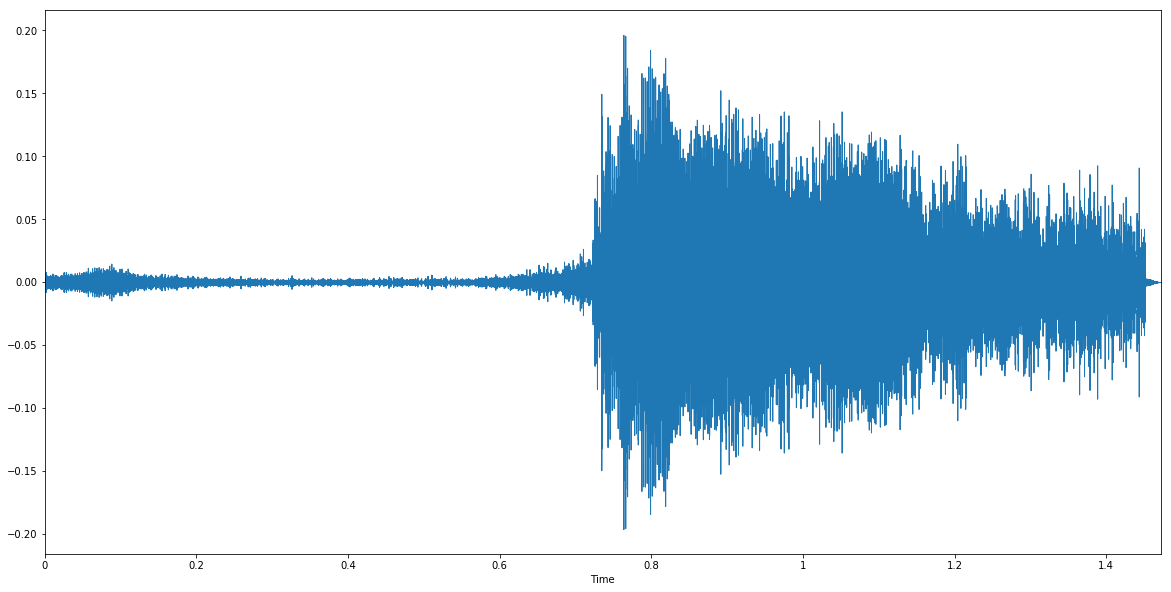

In [43]:
plt.figure(figsize=(20, 10))
librosa.display.waveplot(data, sr=sampling_rate)

In [44]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys


In [45]:
sr, x = scipy.io.wavfile.read('MEL_dia440_utt11_negative_DIS.wav')

In [46]:
nstep = int(sr*0.01)
nwin = int(sr*0.03)
nfft = nwin
window = np.hamming(nwin)

In [56]:
disgustlist[100][-7:]


'DIS.wav'

exploring and extracting features from train/disgust folder.

In [108]:
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index, y in enumerate(disgustlist):
    X, sr = librosa.load(y, res_type='kaiser_fast', duration=2.5)
    hop_length = 512
    mfcc = np.mean(librosa.feature.mfcc(y=X, sr=sr, hop_length=hop_length, n_mfcc=13), axis=0)
    feature = mfcc
    df.loc[bookmark] = [feature]
    bookmark=bookmark+1

In [110]:
df[:5]

,feature
0,"[-29.385769328943635, -27.102267006111425, -26..."
1,"[-20.272378471304187, -19.44672692257116, -17...."
2,"[-18.051524380444377, -17.773407800429776, -17..."
3,"[-16.006416095775826, -16.54322021738142, -19...."
4,"[-15.221296682327663, -16.20656888718791, -18...."


In [131]:
dfdisgust = pd.DataFrame(df['feature'].values.tolist())

In [133]:
dfdisgust.describe()
dfdisgust.isnull().sum()
dfdisgust

,0,1,2,3,4,5,6,7,8,9,...,98,99,100,101,102,103,104,105,106,107
0,-29.385769,-27.102267,-26.049819,-24.248288,-24.598686,-24.903625,-25.140439,-23.844330,-24.410638,-24.456260,...,-18.123917,-18.243784,-19.197232,-21.247812,-20.255452,-18.925781,-18.624867,-18.600991,-18.360657,-14.701775
1,-20.272378,-19.446727,-17.893699,-17.747721,-19.986130,-20.188263,-19.117970,-19.582461,-20.073376,-19.072622,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-18.051524,-17.773408,-17.928478,-17.417934,-16.777639,-17.272941,-14.803191,-13.900637,-15.040099,-20.011642,...,-18.296249,-18.526334,-19.258567,-19.191360,-14.761089,-13.429146,-13.129627,-15.136594,-18.250602,-19.449657
3,-16.006416,-16.543220,-19.800803,-23.233262,-22.364181,-22.150372,-19.337444,-15.000896,-15.588644,-13.590986,...,-23.381035,-22.619478,-21.748958,-22.836868,-18.861753,-17.939550,-18.940802,-19.976132,-19.757969,-18.524046
4,-15.221297,-16.206569,-18.083476,-18.672101,-18.225189,-17.109538,-15.463567,-14.720512,-14.376806,-13.062112,...,-25.653044,-24.949861,-23.516960,-23.739381,-26.529506,-26.652699,-25.010182,-25.221371,-25.870861,-25.591249
5,-26.950418,-28.592343,-33.581529,-33.034827,-30.801634,-27.684808,-25.770127,-26.741939,-26.733864,-24.643630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-14.609354,-18.832304,-33.995699,-35.795349,-36.101497,-38.352418,-37.284283,-35.713723,-38.735212,-37.881637,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-40.223037,-40.919338,-38.471269,-35.540290,-33.651235,-32.089743,-31.494646,-30.192650,-29.922297,-29.574047,...,-23.974691,-21.766821,-22.508335,-23.214020,-22.763306,-22.696324,-23.172093,-25.438369,-22.636419,-12.090968
8,-20.895663,-18.350060,-17.750295,-19.044784,-18.744069,-19.758063,-17.632275,-15.268090,-16.142417,-14.719384,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-8.613691,-11.225021,-15.798333,-18.005385,-17.706511,-18.269387,-18.018362,-17.463657,-18.823980,-19.921915,...,-19.328082,-20.633201,-20.861886,-19.477937,-17.935411,-16.326676,-14.911230,-14.468103,-15.802691,-14.561238


In [136]:
dfdisgust.fillna(dfdisgust.mean(), inplace = True)



In [139]:
dfdisgust

,0,1,2,3,4,5,6,7,8,9,...,98,99,100,101,102,103,104,105,106,107
0,-29.385769,-27.102267,-26.049819,-24.248288,-24.598686,-24.903625,-25.140439,-23.844330,-24.410638,-24.456260,...,-18.123917,-18.243784,-19.197232,-21.247812,-20.255452,-18.925781,-18.624867,-18.600991,-18.360657,-14.701775
1,-20.272378,-19.446727,-17.893699,-17.747721,-19.986130,-20.188263,-19.117970,-19.582461,-20.073376,-19.072622,...,-20.406196,-20.628422,-20.782985,-20.870498,-20.613184,-20.473355,-20.519226,-20.495766,-20.159871,-18.244321
2,-18.051524,-17.773408,-17.928478,-17.417934,-16.777639,-17.272941,-14.803191,-13.900637,-15.040099,-20.011642,...,-18.296249,-18.526334,-19.258567,-19.191360,-14.761089,-13.429146,-13.129627,-15.136594,-18.250602,-19.449657
3,-16.006416,-16.543220,-19.800803,-23.233262,-22.364181,-22.150372,-19.337444,-15.000896,-15.588644,-13.590986,...,-23.381035,-22.619478,-21.748958,-22.836868,-18.861753,-17.939550,-18.940802,-19.976132,-19.757969,-18.524046
4,-15.221297,-16.206569,-18.083476,-18.672101,-18.225189,-17.109538,-15.463567,-14.720512,-14.376806,-13.062112,...,-25.653044,-24.949861,-23.516960,-23.739381,-26.529506,-26.652699,-25.010182,-25.221371,-25.870861,-25.591249
5,-26.950418,-28.592343,-33.581529,-33.034827,-30.801634,-27.684808,-25.770127,-26.741939,-26.733864,-24.643630,...,-20.406196,-20.628422,-20.782985,-20.870498,-20.613184,-20.473355,-20.519226,-20.495766,-20.159871,-18.244321
6,-14.609354,-18.832304,-33.995699,-35.795349,-36.101497,-38.352418,-37.284283,-35.713723,-38.735212,-37.881637,...,-20.406196,-20.628422,-20.782985,-20.870498,-20.613184,-20.473355,-20.519226,-20.495766,-20.159871,-18.244321
7,-40.223037,-40.919338,-38.471269,-35.540290,-33.651235,-32.089743,-31.494646,-30.192650,-29.922297,-29.574047,...,-23.974691,-21.766821,-22.508335,-23.214020,-22.763306,-22.696324,-23.172093,-25.438369,-22.636419,-12.090968
8,-20.895663,-18.350060,-17.750295,-19.044784,-18.744069,-19.758063,-17.632275,-15.268090,-16.142417,-14.719384,...,-20.406196,-20.628422,-20.782985,-20.870498,-20.613184,-20.473355,-20.519226,-20.495766,-20.159871,-18.244321
9,-8.613691,-11.225021,-15.798333,-18.005385,-17.706511,-18.269387,-18.018362,-17.463657,-18.823980,-19.921915,...,-19.328082,-20.633201,-20.861886,-19.477937,-17.935411,-16.326676,-14.911230,-14.468103,-15.802691,-14.561238


In [141]:
disgustoutput = []
for i in (disgustlist):
    disgustoutput.append('disgust')

In [142]:
disgustoutput

['disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'di

In [145]:
dfdisgust[dfdisgust.shape[1]+1] = disgustoutput

In [150]:
dfFinal = dfdisgust

Extracting data from all the folders that come after the disgust folder inside the train folder.

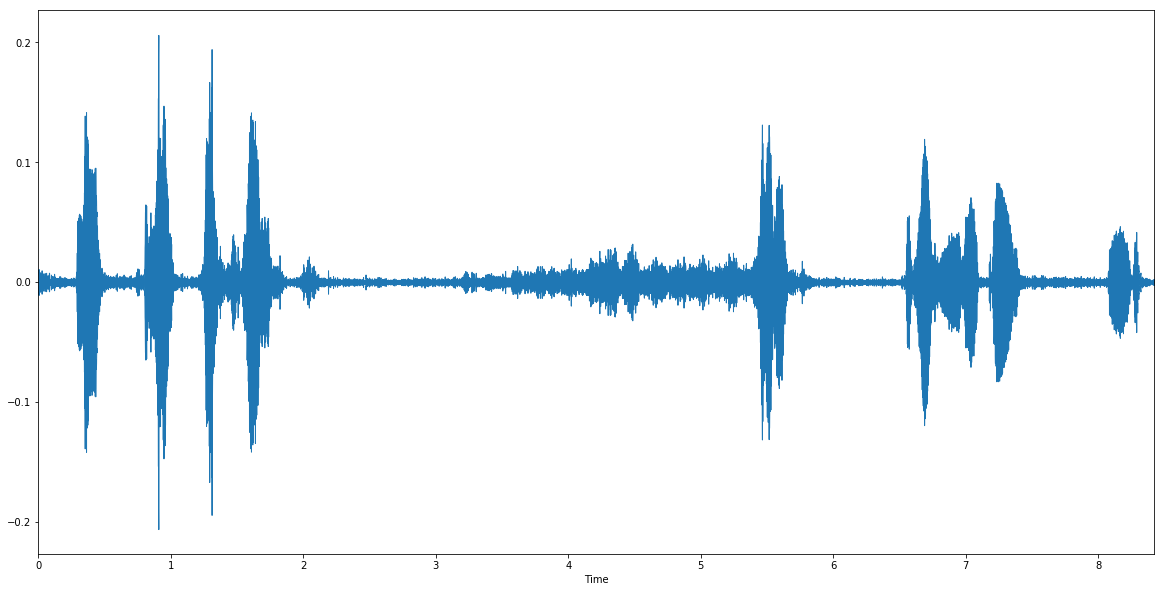

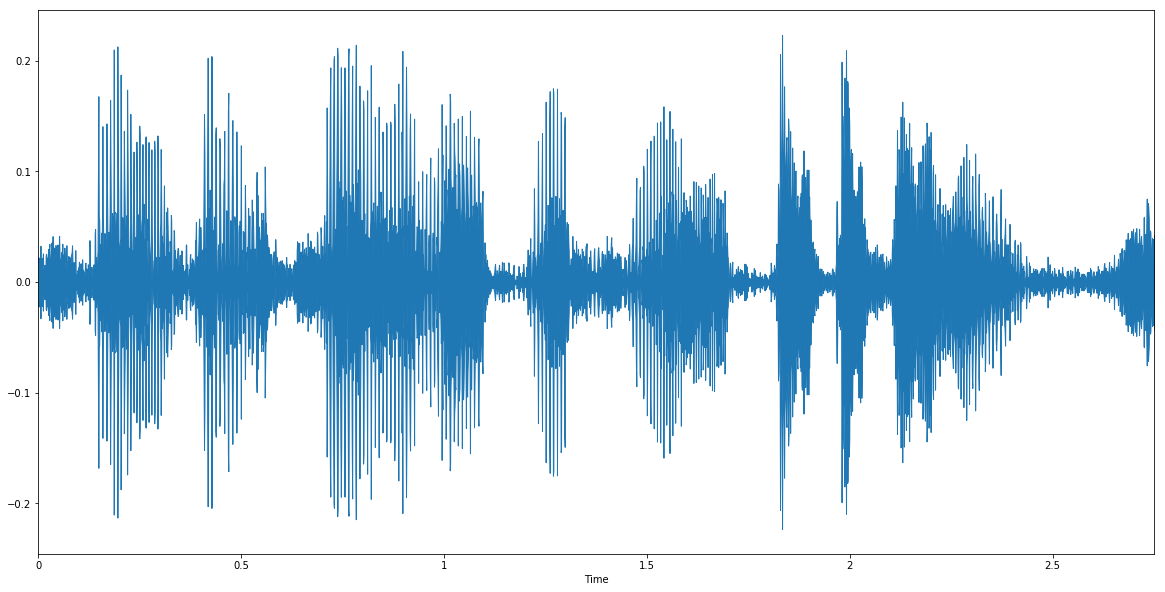

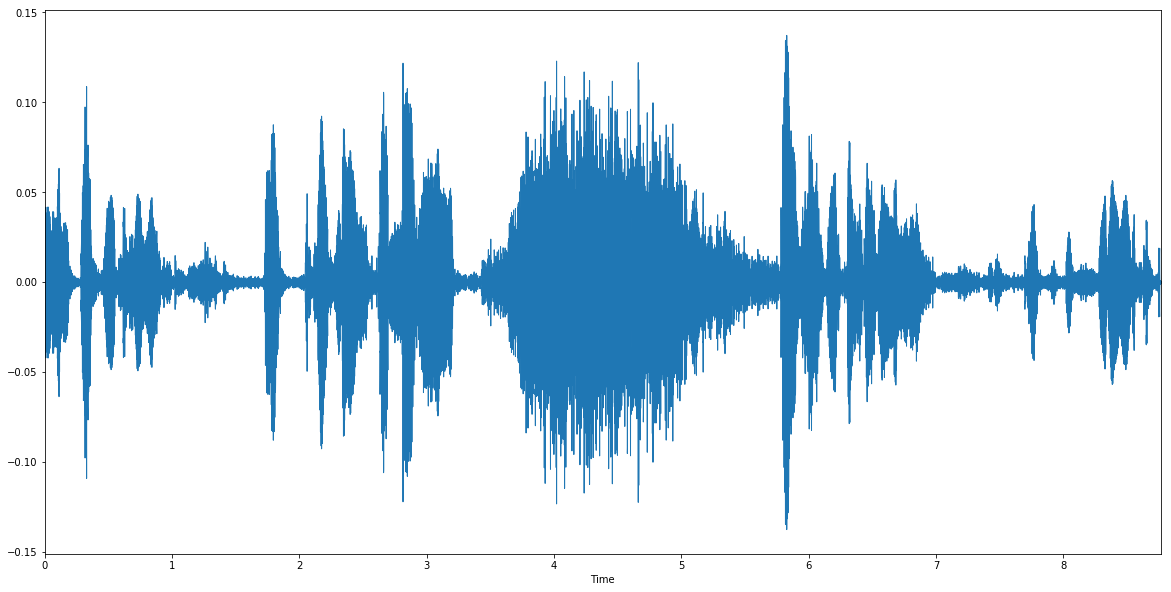

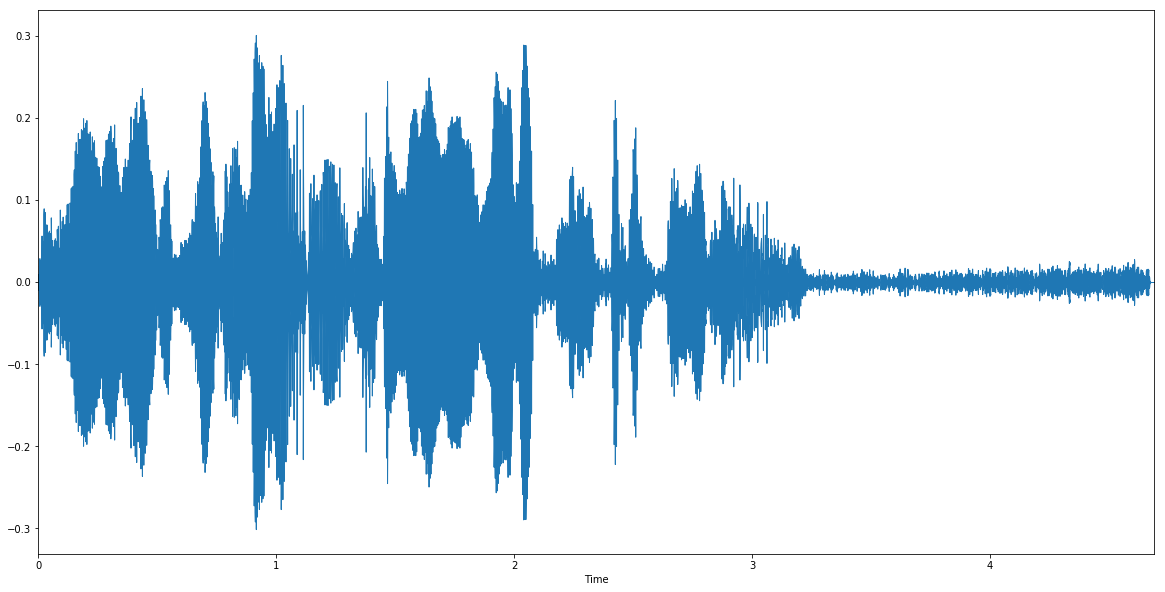

In [165]:
templist = []
df2 = pd.DataFrame(columns=['feature'])
frames = [dfFinal]
for index, names in enumerate(trainfolders[1:]):
    os.chdir(names)
    templist = os.listdir()
    data, sampling_rate = librosa.load(templist[100])
    plt.figure(figsize=(20, 10))
    librosa.display.waveplot(data, sr=sampling_rate)
    tempdf = pd.DataFrame(columns=['feature'])
    bookmark=0
    label = []
    for jindex, names2 in enumerate(templist):
        X, sr = librosa.load(names2, res_type='kaiser_fast', duration=2.5)
        hop_length = 512
        mfcc = np.mean(librosa.feature.mfcc(y=X, sr=sr, hop_length=hop_length, n_mfcc=13), axis=0)
        feature = mfcc
        tempdf.loc[bookmark] = [feature]
        bookmark=bookmark+1
        label.append(names)
    os.chdir('..')
    tempdf = pd.DataFrame(tempdf['feature'].values.tolist())
    tempdf.fillna(tempdf.mean(), inplace = True)
    tempdf[tempdf.shape[1]+1] = label
    tempdf[:5]
    frames.append(tempdf)

In [167]:
result = pd.concat(frames)
result

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,109
0,-29.385769,-27.102267,-26.049819,-24.248288,-24.598686,-24.903625,-25.140439,-23.844330,-24.410638,-24.456260,...,-18.243784,-19.197232,-21.247812,-20.255452,-18.925781,-18.624867,-18.600991,-18.360657,-14.701775,disgust
1,-20.272378,-19.446727,-17.893699,-17.747721,-19.986130,-20.188263,-19.117970,-19.582461,-20.073376,-19.072622,...,-20.628422,-20.782985,-20.870498,-20.613184,-20.473355,-20.519226,-20.495766,-20.159871,-18.244321,disgust
2,-18.051524,-17.773408,-17.928478,-17.417934,-16.777639,-17.272941,-14.803191,-13.900637,-15.040099,-20.011642,...,-18.526334,-19.258567,-19.191360,-14.761089,-13.429146,-13.129627,-15.136594,-18.250602,-19.449657,disgust
3,-16.006416,-16.543220,-19.800803,-23.233262,-22.364181,-22.150372,-19.337444,-15.000896,-15.588644,-13.590986,...,-22.619478,-21.748958,-22.836868,-18.861753,-17.939550,-18.940802,-19.976132,-19.757969,-18.524046,disgust
4,-15.221297,-16.206569,-18.083476,-18.672101,-18.225189,-17.109538,-15.463567,-14.720512,-14.376806,-13.062112,...,-24.949861,-23.516960,-23.739381,-26.529506,-26.652699,-25.010182,-25.221371,-25.870861,-25.591249,disgust
5,-26.950418,-28.592343,-33.581529,-33.034827,-30.801634,-27.684808,-25.770127,-26.741939,-26.733864,-24.643630,...,-20.628422,-20.782985,-20.870498,-20.613184,-20.473355,-20.519226,-20.495766,-20.159871,-18.244321,disgust
6,-14.609354,-18.832304,-33.995699,-35.795349,-36.101497,-38.352418,-37.284283,-35.713723,-38.735212,-37.881637,...,-20.628422,-20.782985,-20.870498,-20.613184,-20.473355,-20.519226,-20.495766,-20.159871,-18.244321,disgust
7,-40.223037,-40.919338,-38.471269,-35.540290,-33.651235,-32.089743,-31.494646,-30.192650,-29.922297,-29.574047,...,-21.766821,-22.508335,-23.214020,-22.763306,-22.696324,-23.172093,-25.438369,-22.636419,-12.090968,disgust
8,-20.895663,-18.350060,-17.750295,-19.044784,-18.744069,-19.758063,-17.632275,-15.268090,-16.142417,-14.719384,...,-20.628422,-20.782985,-20.870498,-20.613184,-20.473355,-20.519226,-20.495766,-20.159871,-18.244321,disgust
9,-8.613691,-11.225021,-15.798333,-18.005385,-17.706511,-18.269387,-18.018362,-17.463657,-18.823980,-19.921915,...,-20.633201,-20.861886,-19.477937,-17.935411,-16.326676,-14.911230,-14.468103,-15.802691,-14.561238,disgust


In [169]:
from sklearn.utils import shuffle
result = shuffle(result)

In [180]:
trainfeatures = result.iloc[:, :-1]
trainlabel = result.iloc[:,-1:]

In [185]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))

C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [194]:
y_train.shape
trainfeatures.shape

(7354, 108)

In [198]:
x_traincnn =np.expand_dims(X_train, axis=2)

In [212]:
os.chdir('..')

In [214]:
os.getcwd()
os.chdir('val')

Extracting data from the validation folder

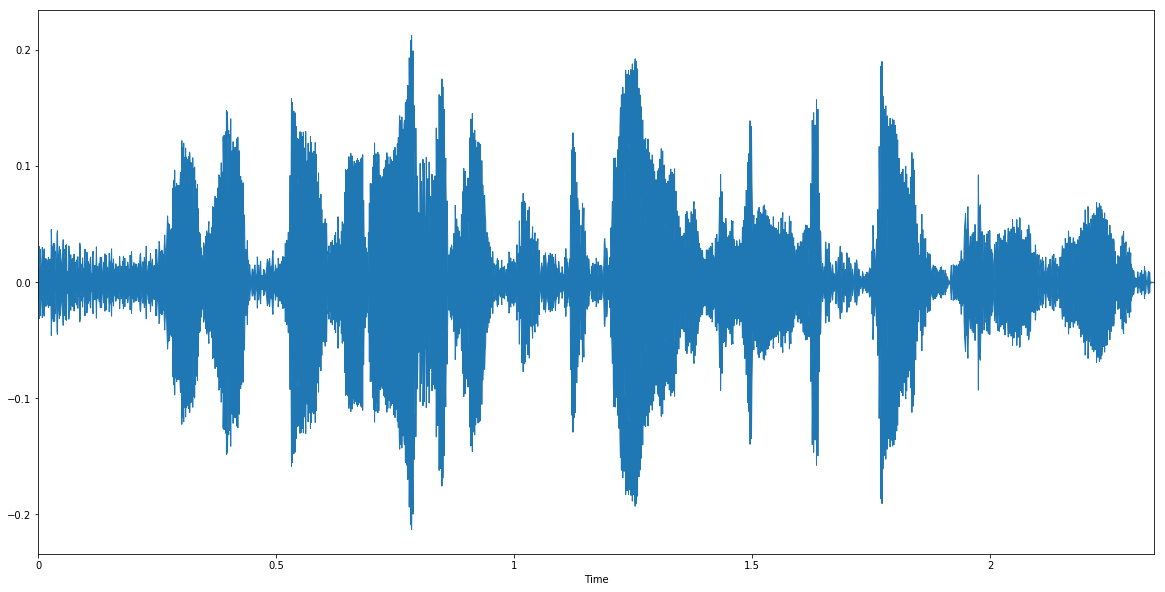

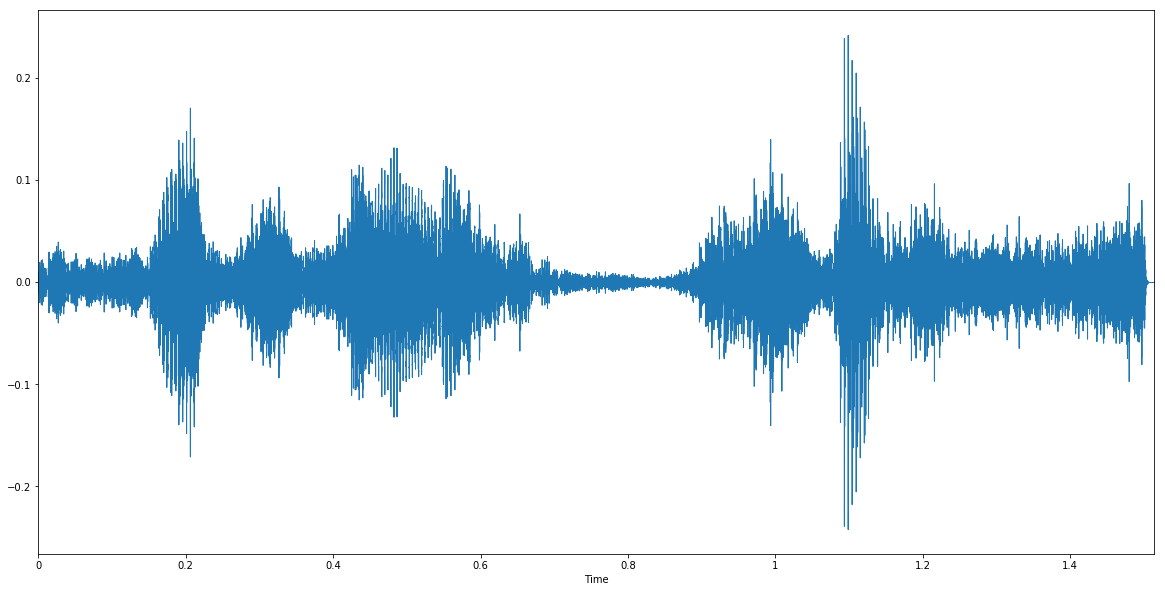

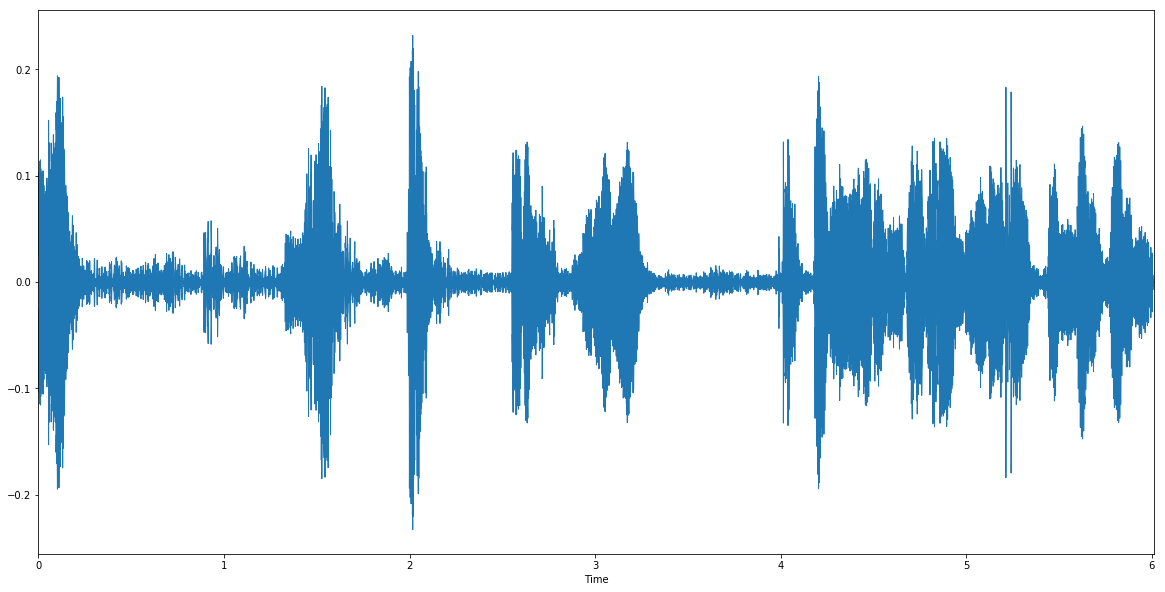

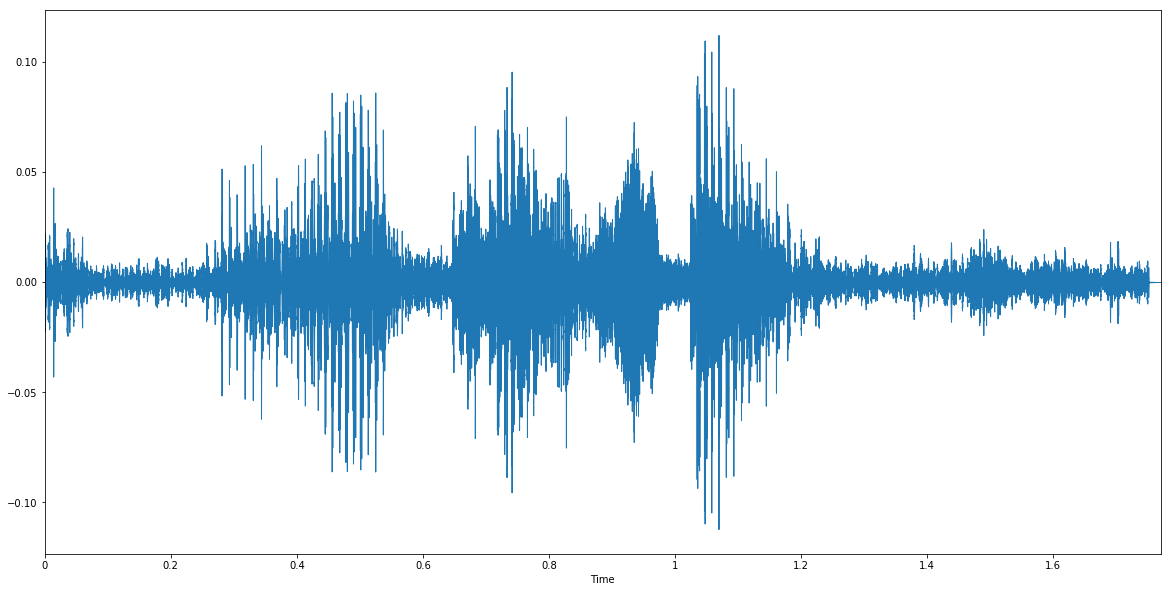

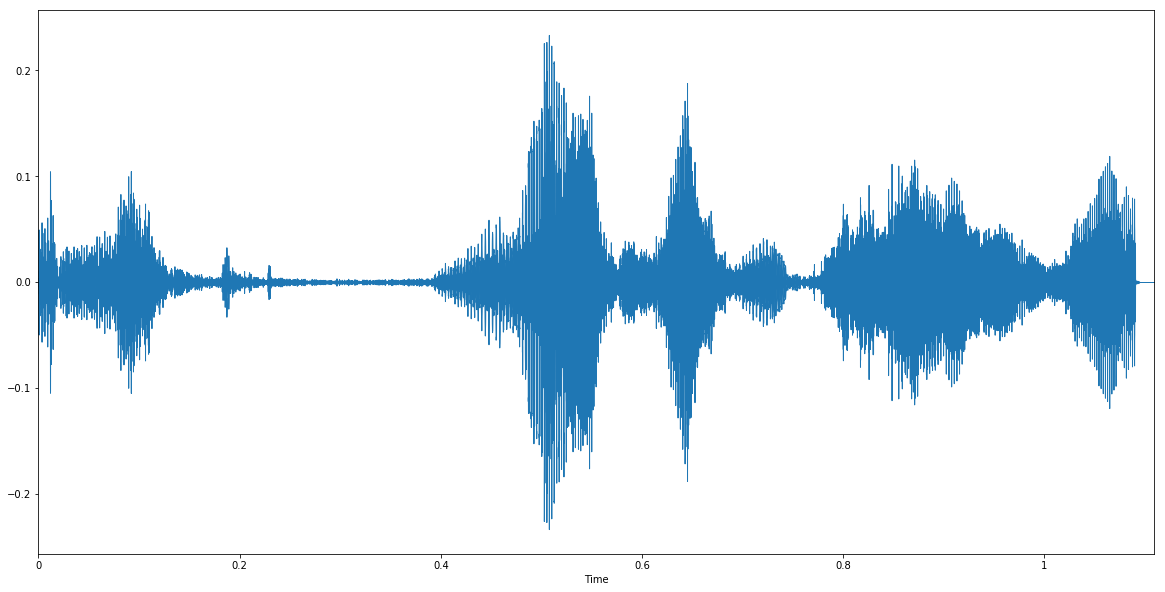

In [218]:
templist2 = []
df3 = pd.DataFrame(columns=['feature'])
frames2 = []
for index, names in enumerate(os.listdir()):
    os.chdir(names)
    templist = os.listdir()
    data, sampling_rate = librosa.load(templist[10])
    plt.figure(figsize=(20, 10))
    librosa.display.waveplot(data, sr=sampling_rate)
    tempdf = pd.DataFrame(columns=['feature'])
    bookmark=0
    label = []
    for jindex, names2 in enumerate(templist):
        X, sr = librosa.load(names2, res_type='kaiser_fast', duration=2.5)
        hop_length = 512
        mfcc = np.mean(librosa.feature.mfcc(y=X, sr=sr, hop_length=hop_length, n_mfcc=13), axis=0)
        feature = mfcc
        tempdf.loc[bookmark] = [feature]
        bookmark=bookmark+1
        label.append(names)
    os.chdir('..')
    tempdf = pd.DataFrame(tempdf['feature'].values.tolist())
    tempdf.fillna(tempdf.mean(), inplace = True)
    tempdf[tempdf.shape[1]+1] = label
    tempdf[:5]
    frames2.append(tempdf)

In [220]:
valdf = pd.concat(frames2)

Shuffling the data, and taking a look at it.

In [224]:
valdf.shape
valdf = shuffle(valdf)
valdf

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,109
368,-25.603067,-24.379457,-23.033390,-22.933511,-24.149583,-28.611951,-30.374665,-25.106573,-19.756922,-16.742810,...,-19.308275,-20.393997,-22.866935,-23.240577,-22.023758,-20.187951,-20.776519,-19.827749,-12.771629,neutral
171,-15.500218,-18.712188,-21.700138,-21.023422,-23.141614,-23.204728,-23.286791,-22.075101,-20.478575,-21.005815,...,-20.200313,-20.864770,-22.182797,-21.352817,-19.347177,-21.456106,-21.214688,-20.089729,-23.401640,happy
33,-25.708669,-26.744935,-27.187730,-27.013792,-29.331922,-30.239497,-30.790587,-30.057839,-28.675287,-27.295663,...,-27.242380,-25.849279,-27.333631,-28.179727,-27.971061,-28.141702,-27.347255,-27.878471,-29.748309,happy
335,-15.408218,-16.266211,-16.230698,-14.812495,-15.199442,-13.891492,-10.389831,-8.959342,-8.113017,-8.731228,...,-19.620976,-19.607600,-19.546382,-19.636435,-19.912034,-19.862271,-19.797920,-19.644214,-17.973945,neutral
20,-27.787513,-27.911634,-27.508501,-28.915117,-28.780912,-27.137533,-27.448016,-26.700895,-26.449533,-26.527579,...,-20.413781,-20.521363,-20.587197,-20.949736,-20.512490,-19.709700,-19.546474,-19.554252,-17.678050,fear
332,-16.039517,-14.358917,-13.634660,-15.085564,-15.565510,-12.967058,-12.786428,-14.186217,-16.174864,-15.907970,...,-19.620976,-19.607600,-19.546382,-19.636435,-19.912034,-19.862271,-19.797920,-19.644214,-17.973945,neutral
91,-25.157531,-24.981363,-24.397135,-22.789842,-22.926575,-24.937968,-24.575917,-25.869195,-25.330637,-25.019671,...,-23.309792,-23.876335,-22.579228,-22.214890,-21.209817,-22.967635,-22.844047,-21.681546,-23.966119,neutral
80,-16.905845,-20.651535,-23.569212,-23.776362,-24.090442,-23.788766,-24.342918,-26.073599,-26.291087,-24.130500,...,-20.556552,-20.626229,-20.695317,-20.550508,-20.275000,-20.420804,-20.292965,-19.923331,-18.759554,happy
73,-17.621488,-17.123894,-18.352947,-16.566947,-15.698597,-18.168041,-14.207870,-9.715402,-9.818305,-12.996242,...,-16.674918,-18.582753,-20.783287,-21.187944,-22.410076,-21.620456,-17.703480,-14.143129,-8.848381,happy
444,-22.629767,-22.047546,-20.917614,-20.512169,-20.421291,-20.931493,-19.489986,-17.838500,-17.375956,-17.059041,...,-19.620976,-19.607600,-19.546382,-19.636435,-19.912034,-19.862271,-19.797920,-19.644214,-17.973945,neutral


In [274]:
testfeatures = valdf.iloc[:, :-1]
testlabel = valdf.iloc[:,-1:]


In [275]:
X_test = np.array(testfeatures)
y_test = np.array(testlabel)


In [276]:
X_test.shape

(830, 108)

In [277]:
y_test.shape

(830, 1)

In [278]:
lb = LabelEncoder()
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [292]:
x_testcnn.shape

(830, 108, 1)

In [280]:
x_testcnn =np.expand_dims(X_test, axis=2)

Trying a couple of different architectures.

In [281]:
model = Sequential()
model.add(Conv1D(256, 5, padding = 'same', input_shape=(108,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5, padding = 'same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128,5,padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(5))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_21 (Conv1D)           (None, 108, 256)          1536      
_________________________________________________________________
activation_25 (Activation)   (None, 108, 256)          0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 108, 128)          163968    
_________________________________________________________________
activation_26 (Activation)   (None, 108, 128)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 108, 128)          0         
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 13, 128)           0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 13, 128)          

In [283]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


used these parameters, didn't give much accuracy. also tried batch_size of 10, with 700 epochs, the accuracy converged after 30th epoch.

In [284]:
cnnhistory = model.fit(x_traincnn, y_train, batch_size=100, epochs = 20, validation_data=(x_testcnn, y_test))

Train on 7354 samples, validate on 830 samples
Epoch 1/20
7354/7354 [==============================] - 30s 4ms/step - loss: 1.1378 - accuracy: 0.6123 - val_loss: 1.0937 - val_accuracy: 0.6229
Epoch 2/20
7354/7354 [==============================] - 30s 4ms/step - loss: 1.0931 - accuracy: 0.6243 - val_loss: 1.0913 - val_accuracy: 0.6229
Epoch 3/20
7354/7354 [==============================] - 30s 4ms/step - loss: 1.0894 - accuracy: 0.6244 - val_loss: 1.0905 - val_accuracy: 0.6229
Epoch 4/20
7354/7354 [==============================] - 30s 4ms/step - loss: 1.0880 - accuracy: 0.6244 - val_loss: 1.0936 - val_accuracy: 0.6229
Epoch 5/20
7354/7354 [==============================] - 29s 4ms/step - loss: 1.0861 - accuracy: 0.6244 - val_loss: 1.0912 - val_accuracy: 0.6229
Epoch 6/20
7354/7354 [==============================] - 29s 4ms/step - loss: 1.0842 - accuracy: 0.6244 - val_loss: 1.0909 - val_accuracy: 0.6229
Epoch 7/20
3600/7354 [=============>................] - ETA: 14s - loss: 1.0694 - a

KeyboardInterrupt: 

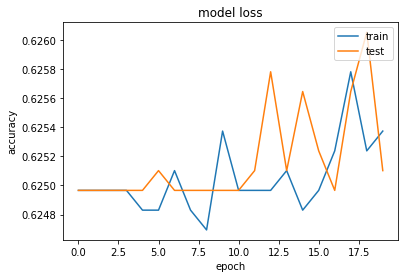

In [286]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [294]:
model2 = Sequential()

model2.add(Conv1D(256, 5,padding='same',
                 input_shape=(216,1)))
model2.add(Activation('relu'))
model2.add(Conv1D(128, 5,padding='same'))
model2.add(Activation('relu'))
model2.add(Dropout(0.1))
model2.add(MaxPooling1D(pool_size=(8)))
model2.add(Conv1D(128, 5,padding='same',))
model2.add(Activation('relu'))
model2.add(Conv1D(128, 5,padding='same',))
model2.add(Activation('relu'))
model2.add(Conv1D(128, 5,padding='same',))
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(Conv1D(128, 5,padding='same',))
model2.add(Activation('relu'))
model2.add(Flatten())
model2.add(Dense(10))
model2.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)
model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_25 (Conv1D)           (None, 216, 256)          1536      
_________________________________________________________________
activation_30 (Activation)   (None, 216, 256)          0         
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 216, 128)          163968    
_________________________________________________________________
activation_31 (Activation)   (None, 216, 128)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 27, 128)           0         
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 27, 128)          

In [254]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnnhistory = model.fit(x_traincnn, y_train, batch_size=32, epochs=20, validation_data=(x_testcnn, y_test))

Train on 7354 samples, validate on 7354 samples
Epoch 1/20
7354/7354 [==============================] - 38s 5ms/step - loss: 1.0535 - accuracy: 0.6247 - val_loss: 1.0648 - val_accuracy: 0.6247
Epoch 2/20
7354/7354 [==============================] - 38s 5ms/step - loss: 1.0533 - accuracy: 0.6246 - val_loss: 1.0545 - val_accuracy: 0.6247
Epoch 3/20
7354/7354 [==============================] - 38s 5ms/step - loss: 1.0515 - accuracy: 0.6247 - val_loss: 1.0510 - val_accuracy: 0.6247
Epoch 4/20
7354/7354 [==============================] - 38s 5ms/step - loss: 1.0521 - accuracy: 0.6248 - val_loss: 1.0492 - val_accuracy: 0.6247
Epoch 5/20
7354/7354 [==============================] - 39s 5ms/step - loss: 1.0505 - accuracy: 0.6248 - val_loss: 1.0492 - val_accuracy: 0.6248
Epoch 6/20
7354/7354 [==============================] - 39s 5ms/step - loss: 1.0509 - accuracy: 0.6248 - val_loss: 1.0624 - val_accuracy: 0.6248
Epoch 7/20
7354/7354 [==============================] - 40s 5ms/step - loss: 1.050

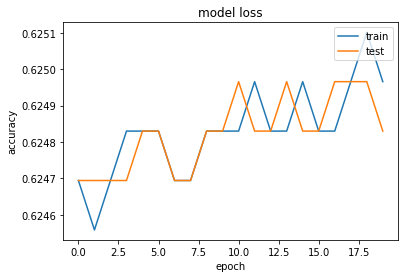

In [255]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Train on 7354 samples, validate on 830 samples
Epoch 1/10
7354/7354 [==============================] - 21s 3ms/step - loss: 1.0562 - accuracy: 0.6246 - val_loss: 1.0925 - val_accuracy: 0.6229
Epoch 2/10
7354/7354 [==============================] - 20s 3ms/step - loss: 1.0549 - accuracy: 0.6247 - val_loss: 1.1031 - val_accuracy: 0.6229
Epoch 3/10
7354/7354 [==============================] - 20s 3ms/step - loss: 1.0557 - accuracy: 0.6246 - val_loss: 1.1009 - val_accuracy: 0.6229
Epoch 4/10
7354/7354 [==============================] - 20s 3ms/step - loss: 1.0539 - accuracy: 0.6246 - val_loss: 1.0929 - val_accuracy: 0.6229
Epoch 5/10
7354/7354 [==============================] - 21s 3ms/step - loss: 1.0538 - accuracy: 0.6247 - val_loss: 1.0960 - val_accuracy: 0.6229
Epoch 6/10
7354/7354 [==============================] - 20s 3ms/step - loss: 1.0533 - accuracy: 0.6246 - val_loss: 1.0943 - val_accuracy: 0.6229
Epoch 7/10
7354/7354 [==============================] - 20s 3ms/step - loss: 1.0525

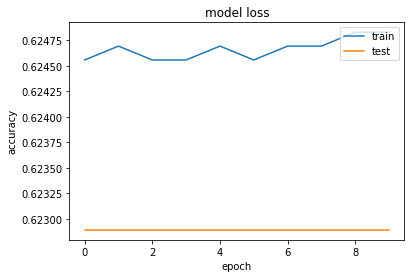

In [295]:
opt = keras.optimizers.Adam(learning_rate=0.000001, amsgrad = False)
model2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
cnnhistory = model.fit(x_traincnn, y_train, batch_size=32, epochs=10, validation_data=(x_testcnn, y_test))
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
trying svm now. 

In [289]:
x_traincnn.shape

(7354, 108, 1)

In [290]:
from sklearn import svm
svc = svm.SVC(kernel='rbf', C=1, gamma = 'auto', probability=True).fit(X_train, trainlabel)


C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [291]:
svc.score(X_test, testlabel)

0.6228915662650603

In [272]:
X_train.shape

(7354, 108)

In [273]:
X_test.shape

(7354, 108)